In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pathlib
from pathlib import Path
import os
import cv2
print (tf.__version__)
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D,Rescaling
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import pandas as pd

2.9.0


In [3]:
def shape(dataset):
    dataset_to_numpy = list(dataset.as_numpy_iterator())
    shape = tf.shape(dataset_to_numpy)
    print(shape)

In [4]:
directory = 'MathSymbols'
img_height = 45
img_width = 45
batch_size = 128

In [49]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(45, 45),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 375974 files belonging to 82 classes.


In [65]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [57]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.8,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.1,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)

Found 375974 files belonging to 82 classes.
Using 75195 files for training.
Found 375974 files belonging to 82 classes.
Using 37597 files for validation.


In [30]:
class_names = train_ds.class_names
print(class_names)
class_names1 = val_ds.class_names
print (class_names1)
print (len(class_names))
num_classes = len(class_names)

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan',

(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)
(45, 45, 1)


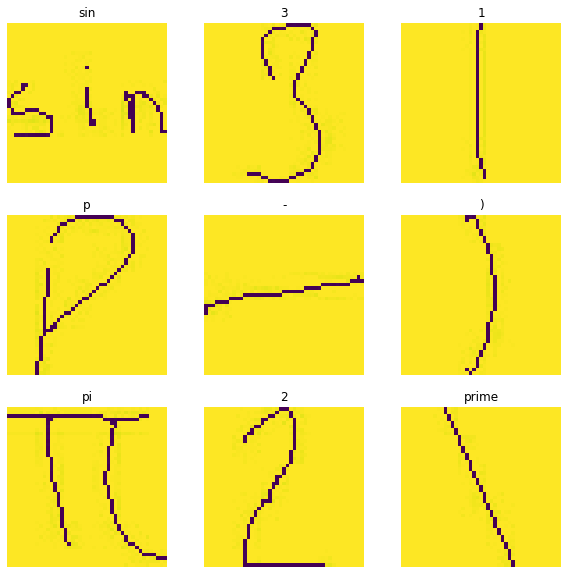

In [31]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(images[i].shape)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

0.0 1.0
(128, 45, 45, 1)
(128,)


In [42]:
# Define the model architecture
model2 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(45, 45)),
  keras.layers.Reshape(target_shape=(45, 45, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(num_classes)
])

# Define how to train the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the digit classification model
hist2 = model2.fit(train_ds,
                  batch_size=batch_size,
                  epochs=5,
                  verbose=1,
                  validation_data=val_ds)

Epoch 1/5
2350/2350 [==============================] - 493s 210ms/step - loss: 1.6196 - accuracy: 0.7848 - val_loss: 0.8659 - val_accuracy: 0.7759
Epoch 2/5
2350/2350 [==============================] - 451s 192ms/step - loss: 0.6338 - accuracy: 0.8262 - val_loss: 0.3410 - val_accuracy: 0.9091
Epoch 3/5
2350/2350 [==============================] - 462s 196ms/step - loss: 0.3502 - accuracy: 0.8975 - val_loss: 0.2173 - val_accuracy: 0.9398
Epoch 4/5
2350/2350 [==============================] - 461s 196ms/step - loss: 0.2244 - accuracy: 0.9321 - val_loss: 0.1379 - val_accuracy: 0.9637
Epoch 5/5
2350/2350 [==============================] - 472s 201ms/step - loss: 0.1561 - accuracy: 0.9521 - val_loss: 0.1043 - val_accuracy: 0.9734


In [36]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 45, 45, 3)         0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [38]:
input_shape = (45,45,1)
model = Sequential()
model.add(Rescaling(1./255, input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [39]:
model.get_config()

{'name': 'sequential_14',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 45, 45, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'rescaling_19_input'}},
  {'class_name': 'Rescaling',
   'config': {'name': 'rescaling_19',
    'trainable': True,
    'batch_input_shape': (None, 45, 45, 1),
    'dtype': 'float32',
    'scale': 0.00392156862745098,
    'offset': 0.0}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_29',
    'trainable': True,
    'batch_input_shape': (None, 45, 45, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
  

In [40]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_19 (Rescaling)    (None, 45, 45, 1)         0         
                                                                 
 conv2d_29 (Conv2D)          (None, 43, 43, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 flatten_13 (Flatten)        (None, 25600)             0         
                                                     

In [41]:
epochs = 10
hist = model.fit(train_ds,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=val_ds)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 82) are incompatible


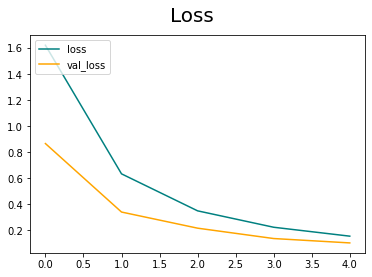

In [43]:
hist = hist2
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

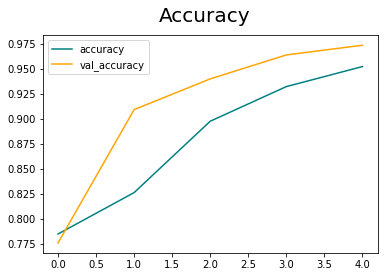

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
score = model2.evaluate(dataset, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2938/2938 [==============================] - 162s 55ms/step - loss: 0.0712 - accuracy: 0.9792
Test loss: 0.0712389200925827
Test accuracy: 0.9791581630706787


In [60]:
score = model2.evaluate(train_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

588/588 [==============================] - 32s 54ms/step - loss: 0.0754 - accuracy: 0.9771
Test loss: 0.07540647685527802
Test accuracy: 0.9771128296852112


In [59]:
score = model2.evaluate(val_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

294/294 [==============================] - 16s 53ms/step - loss: 0.1035 - accuracy: 0.9735
Test loss: 0.10353613644838333
Test accuracy: 0.9735085368156433


In [47]:
model2.save('model2.h5')

In [62]:
c=0
for i in dataset:
   c = c+1 
print (c)

2938
